<a href="https://colab.research.google.com/github/nguyenbac5299/Assignment7/blob/master/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Face Detection

In [ ]:
import cv2
from google.colab.patches import cv2_imshow



## OpenCV




### Loading Image

In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image=cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/people.jpg')

In [ ]:
image.shape

(533, 710, 3)

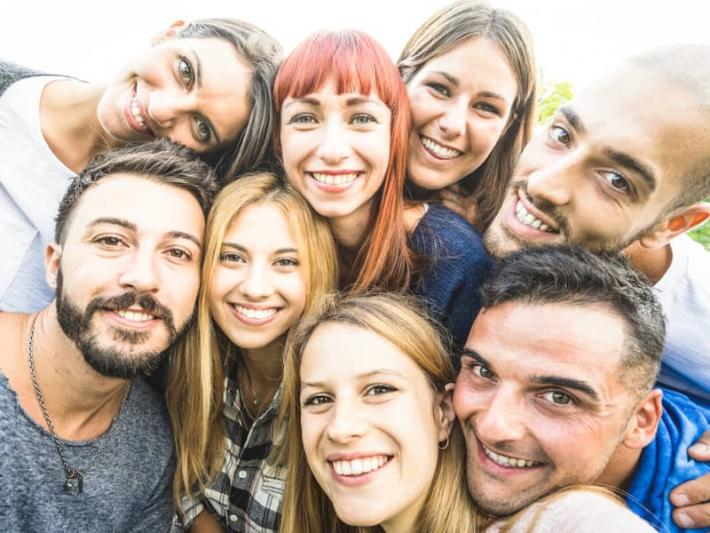

In [ ]:
#cv2.imshow(image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
image=cv2.resize(image,(670,500))
image.shape

(500, 670, 3)

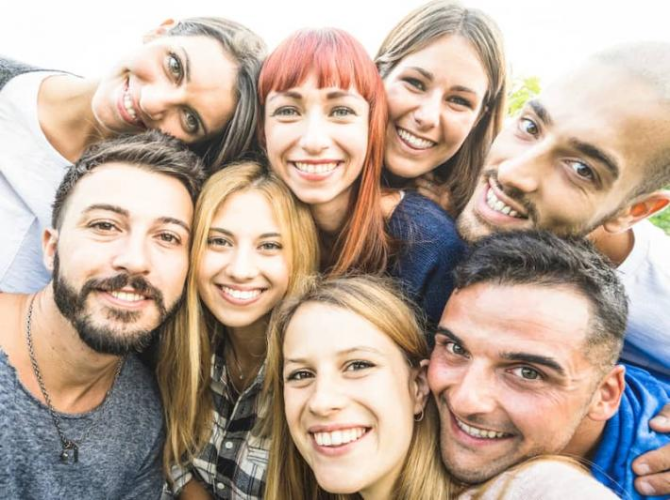

In [ ]:
cv2_imshow(image)

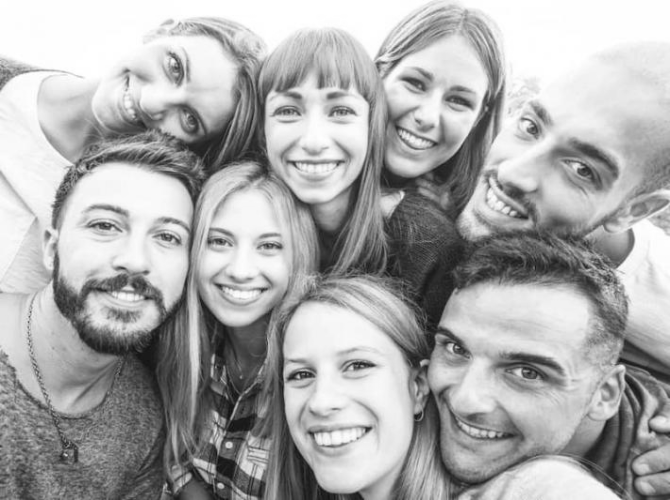

In [ ]:
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

In [ ]:
image_gray.shape

(500, 670)

### Detecting faces

In [ ]:
face_detector=cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcasde/haarcascade_frontalface_default.xml')

KeyboardInterrupt: ignored

In [ ]:
detections=face_detector.detectMultiScale(image_gray)

In [ ]:
detections

In [ ]:
len(detections)

In [ ]:
for(x,y,w,h) in detections:
  cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
cv2_imshow(image)


### Haaecascade parameters

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/people.jpg')
# image = cv2.resize(image, (800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.07)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/people1.jpg')
# image = cv2.resize(image, (800, 600))
image_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray1, scaleFactor=1.0463, minNeighbors=3,
                                            minSize=(30,30))
for (x, y, w, h) in detections:
  cv2.rectangle(image1, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image1)

### Eye detection

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/people.jpg')
eye_detector=cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcasde/haarcascade_eye.xml')
eye_detection=eye_detector.detectMultiScale(image_gray,scaleFactor=1.2, minNeighbors=3, maxSize=(50,50))
for(x,y,w,h) in eye_detection:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(image)

### Other Objects

## DLib


In [ ]:
import dlib

### Detecting faces with HOG

In [ ]:
image=cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/people.jpg')

In [ ]:
cv2_imshow(image)

In [ ]:
face_detector_hog=dlib.get_frontal_face_detector()


In [ ]:
detections=face_detector_hog(image,1)

In [ ]:
detections, len(detections)

In [ ]:
for face in detections:
  cv2.rectangle(image, (face.left(), face.top()),(face.right(), face.bottom()),(255,0,0),2)

In [ ]:
cv2_imshow(image)

### Detecting faces with CNN


In [ ]:
!pip install face_recognition


In [ ]:
image2=cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/people.jpg')
cnn_detector=dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Colab Notebooks/haarcasde/mmod_human_face_detector.dat')


In [ ]:
detections=cnn_detector(image2,1)
for face in detections:
  l,t,r,b,c=face.rect.left(), face.rect.top(), face.rect.right(),face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image2, (l,t),(r,b),(255,255,0),2)
  

In [ ]:
cv2_imshow(image2)

### Harrcascade x HOG x CNN

# Face Recognization


In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


## OpenCV

### Loading DataSet


In [ ]:
import zipfile
path='/content/drive/MyDrive/Colab Notebooks/data/Datasets/yalefaces.zip'
zip_object=zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

### Pre-Processing Image

In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject04.glasses.gif', 'subject05.happy.gif', 'subject11.centerlight.gif', 'subject13.noglasses.gif', 'subject13.surprised.gif', 'subject09.normal.gif', 'subject10.rightlight.gif', 'subject03.sleepy.gif', 'subject02.surprised.gif', 'subject04.wink.gif', 'subject07.rightlight.gif', 'subject12.happy.gif', 'subject15.happy.gif', 'subject05.glasses.gif', 'subject11.sleepy.gif', 'subject13.normal.gif', 'subject06.surprised.gif', 'subject14.happy.gif', 'subject06.centerlight.gif', 'subject07.normal.gif', 'subject07.sad.gif', 'subject06.wink.gif', 'subject09.noglasses.gif', 'subject10.normal.gif', 'subject02.happy.gif', 'subject11.noglasses.gif', 'subject04.rightlight.gif', 'subject13.rightlight.gif', 'subject03.noglasses.gif', 'subject04.sleepy.gif', 'subject04.noglasses.gif', 'subject01.sad.gif', 'subject12.surprised.gif', 'subject03.sad.gif', 'subject08.wink.gif', 'subject14.rightlight.gif', 'subject15.glasses.gif', 'subject07.noglasses.gif', 'subject13.centerlight.gif', 'subject08.slee

In [ ]:
def get_image_data():
  paths=[os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces=[]
  ids=[]
  for path in paths:
    image=Image.open(path).convert('L')
    image_np=np.array(image,'uint8')

    id=int(os.path.split(path)[1].split('.')[0].replace('subject',''))
   # print(id)
    ids.append(id)
    faces.append(image_np)
  return np.array(ids), faces



In [ ]:
ids, faces=get_image_data()

In [ ]:
ids

array([ 4,  5, 11, 13, 13,  9, 10,  3,  2,  4,  7, 12, 15,  5, 11, 13,  6,
       14,  6,  7,  7,  6,  9, 10,  2, 11,  4, 13,  3,  4,  4,  1, 12,  3,
        8, 14, 15,  7, 13,  8,  2, 10,  3, 14,  6,  7,  7, 11,  9, 12, 15,
        2, 15,  8,  4,  4,  2,  7,  9,  6, 11,  3, 11,  5,  5,  8,  9,  6,
       10,  5,  6,  9, 10,  9, 14, 10,  5,  1,  1, 12, 14, 15, 12, 13,  9,
        3, 11, 10, 15,  2,  3,  1,  7,  2, 12, 14, 12,  8,  2, 11, 11,  4,
       13,  3,  6,  2,  5, 14, 10,  9,  5, 12,  3, 12,  4,  1,  8,  1, 14,
       13, 14,  8,  6,  1, 10,  5, 13,  1,  8,  1,  7,  8, 15, 15, 15])

### LBPH Classifier

In [ ]:
lbph_classifier=cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14, grid_x=9, grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [ ]:
# default value =8 => 64 histogram
8*8

64

### Recognize Face

In [ ]:
lbph_face_classifier=cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
#6
test_image='/content/yalefaces/train/subject06.noglasses.gif'

In [ ]:
image=Image.open(test_image).convert('L')
image_np=np.array(image,'uint8')
image_np

array([[110,  96,  91, ..., 224, 224, 236],
       [239, 218, 211, ..., 244, 236, 239],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [199, 192, 195, ..., 227, 210, 221],
       [204, 199, 202, ..., 228, 203, 202],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [ ]:
prediction= lbph_face_classifier.predict(image_np)
prediction

(6, 0.0)

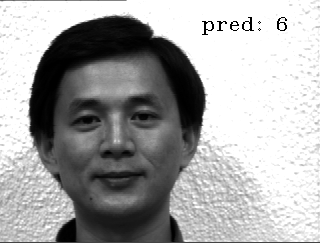

In [ ]:
image_np=np.array(image,'uint8')

cv2.putText(image_np,'pred: '+str(prediction[0]),(200,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2_imshow(image_np)

### Evaluate Classifier

In [ ]:
paths=[os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions=[]
expected_outputs=[]
for path in paths:
  image=Image.open(path).convert('L')
  image_np=np.array(image,'uint8')
  prediction, _=lbph_face_classifier.predict(image_np)
  expected_output=int(os.path.split(path)[1].split('.')[0].replace('subject',''))
  predictions.append(prediction)
  expected_outputs.append(expected_output)


In [ ]:
predictions=np.array(predictions)
expected_outputs=np.array(expected_outputs)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.6333333333333333

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(expected_outputs, predictions)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

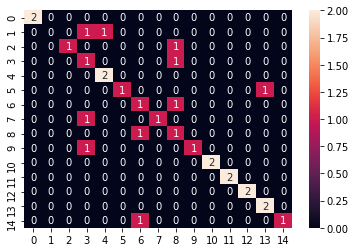

In [ ]:
import seaborn 
seaborn.heatmap(cm, annot=True)

## Dlib


### Detecting facial point

In [ ]:
import dlib


In [ ]:
face_detector= dlib.get_frontal_face_detector()
points_detector=dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/data/Weights/shape_predictor_68_face_landmarks.dat')

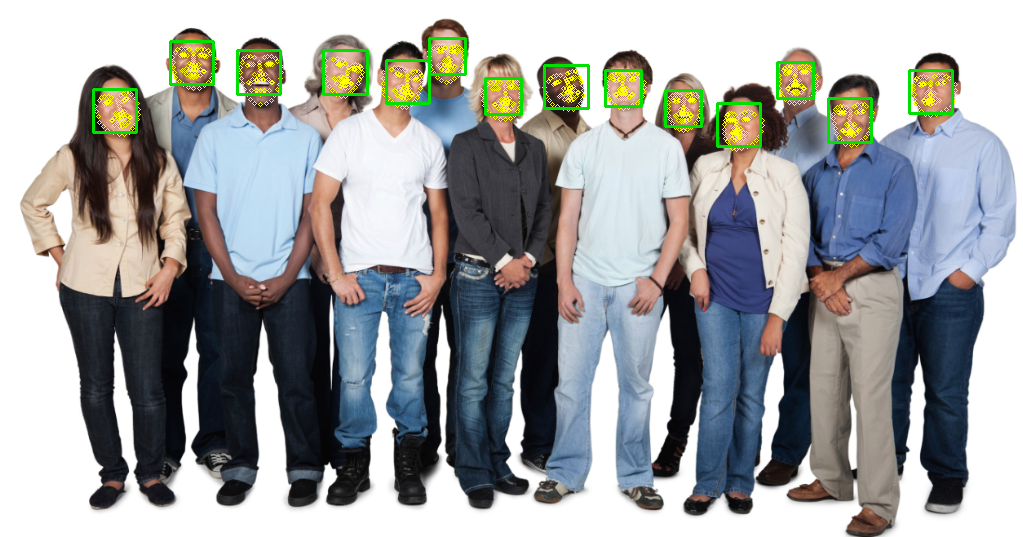

In [ ]:
image= cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/Images/people2.jpg')
face_detection=face_detector(image,1)
for face in face_detection:
  points=points_detector(image, face)
  for point in points.parts():
    cv2.circle(image,(point.x,point.y), 2, (0,255,255))
  l,t,r,b=face.left(), face.top(), face.right(),face.bottom()
  cv2.rectangle(image,(l,t),(r,b),(0,225,0),2)
cv2_imshow(image)

### Detecting facial descriptors

In [ ]:
import os

In [ ]:
face_detector= dlib.get_frontal_face_detector()
points_detector=dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/data/Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor=dlib.face_recognition_model_v1('/content/drive/MyDrive/Colab Notebooks/data/Weights/dlib_face_recognition_resnet_model_v1.dat')


In [ ]:
index={}
idx=0
face_descriptors=None

paths=[os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  image=Image.open(path).convert('RGB')
  image_np=np.array(image,'uint8')
  face_detection=face_detector(image_np,1)
  for face in face_detection:
    l,t,r,b=face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np,(l,t),(r,b),(0,0,225),2)
    points=points_detector(image_np, face)
    for point in points.parts():
      cv2.circle(image_np,(point.x,point.y),2,(0,255,0))

    face_descriptor=face_descriptor_extractor.compute_face_descriptor(image_np, points)
      # format information in a list
    face_descriptor=[f for f in face_descriptor]
    face_descriptor=np.array(face_descriptor, dtype=np.float64)
      #convert to a matrix (1,128)
    face_descriptor=face_descriptor[np.newaxis,:]
    if face_descriptors is None:
       face_descriptors=face_descriptor
    else:
      face_descriptors=np.concatenate((face_descriptors, face_descriptor), axis=0)
        
    index[idx]=path
    idx+=1


    #cv2_imshow(image_np)

In [ ]:
face_descriptors.shape

(132, 128)

### Calculating the distance between faces

In [ ]:
index

{0: '/content/yalefaces/train/subject04.glasses.gif',
 1: '/content/yalefaces/train/subject05.happy.gif',
 2: '/content/yalefaces/train/subject11.centerlight.gif',
 3: '/content/yalefaces/train/subject13.noglasses.gif',
 4: '/content/yalefaces/train/subject13.surprised.gif',
 5: '/content/yalefaces/train/subject09.normal.gif',
 6: '/content/yalefaces/train/subject10.rightlight.gif',
 7: '/content/yalefaces/train/subject03.sleepy.gif',
 8: '/content/yalefaces/train/subject02.surprised.gif',
 9: '/content/yalefaces/train/subject04.wink.gif',
 10: '/content/yalefaces/train/subject07.rightlight.gif',
 11: '/content/yalefaces/train/subject12.happy.gif',
 12: '/content/yalefaces/train/subject15.happy.gif',
 13: '/content/yalefaces/train/subject05.glasses.gif',
 14: '/content/yalefaces/train/subject11.sleepy.gif',
 15: '/content/yalefaces/train/subject13.normal.gif',
 16: '/content/yalefaces/train/subject06.surprised.gif',
 17: '/content/yalefaces/train/subject14.happy.gif',
 18: '/content/ya

In [ ]:
np.linalg.norm(face_descriptors[131]- face_descriptors[130])

0.30239071281906715

In [ ]:
np.linalg.norm(face_descriptors[131]- face_descriptors[128])

0.6203903736039897

In [ ]:
np.linalg.norm(face_descriptors[131]- face_descriptors, axis=1)

array([0.80102719, 0.61039616, 0.72564481, 0.65007057, 0.62695009,
       0.56447277, 0.73472958, 0.57588148, 0.71356203, 0.74994598,
       0.75577488, 0.69712102, 0.25915227, 0.67160723, 0.72616897,
       0.69767337, 0.63484632, 0.61024029, 0.76066054, 0.67517702,
       0.64478414, 0.67752993, 0.56447277, 0.7164951 , 0.68836406,
       0.67912753, 0.82527488, 0.61996892, 0.56528181, 0.78606593,
       0.78334654, 0.70425292, 0.68982769, 0.58563339, 0.60947932,
       0.80609264, 0.40538204, 0.67517702, 0.70678752, 0.67702939,
       0.68802546, 0.69259007, 0.5788472 , 0.83135287, 0.6949632 ,
       0.73770309, 0.68579744, 0.53723843, 0.70757823, 0.17457285,
       0.69807413, 0.37761835, 0.66055711, 0.83052539, 0.77522387,
       0.71902551, 0.77888001, 0.55384463, 0.70846346, 0.64967952,
       0.56528181, 0.65988373, 0.61746228, 0.63506015, 0.60240678,
       0.59245628, 0.65690597, 0.73771677, 0.62613429, 0.70512695,
       0.62735247, 0.71490367, 0.54850547, 0.69805313, 0.71933

In [ ]:
np.argmin(np.linalg.norm(face_descriptors[131]- face_descriptors[0:130], axis=1))

49

In [ ]:
np.linalg.norm(face_descriptors[131]- face_descriptors[49])

0.17457284533709724

### Detecting face with Dlib

In [ ]:
paths=[os.path.join()]

# New Section